/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning 

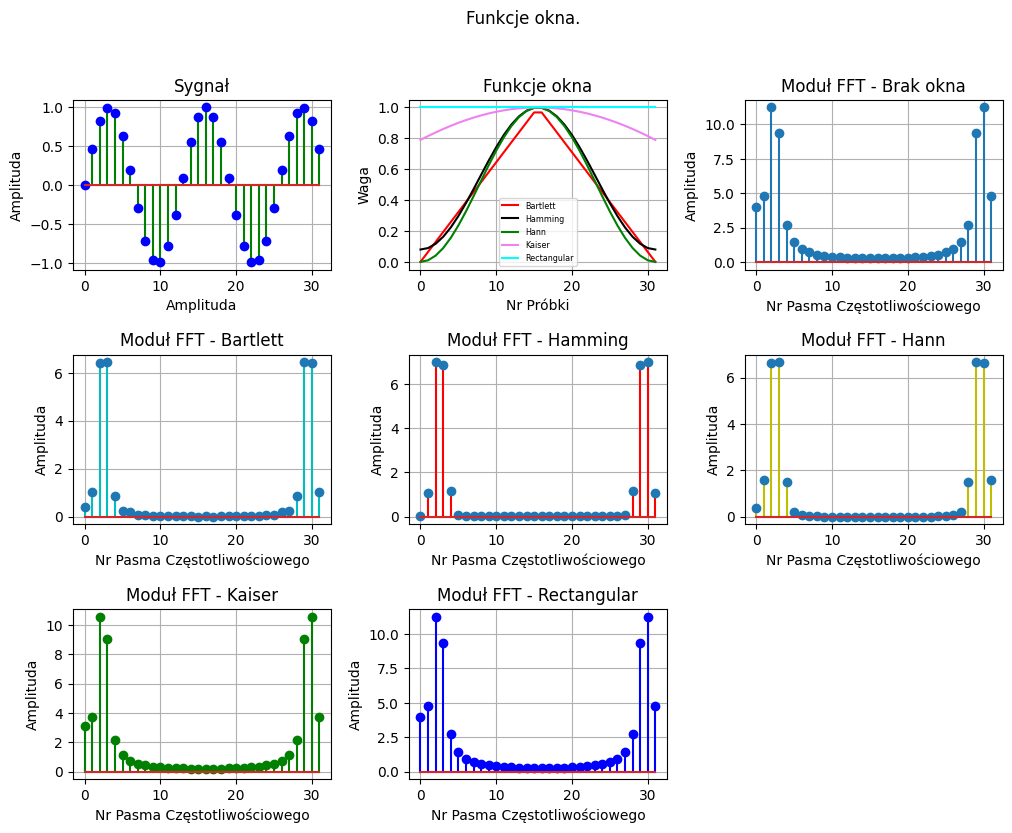

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi as PI
from math import sin
from scipy import signal
import IPython.display as ipd

N = 32#liczba próbek
x = np.arange(N)#dziedzina
y = np.sin((x/N) * 2 * PI * 2.5)#wzór sygnału sinusoidalnego

wykresy = []#tablica szablonów wykresów
wykresy.append([signal.windows.bartlett(N), "red", "Bartlett"])
wykresy.append([signal.windows.hamming(N), "black", "Hamming"])
wykresy.append([signal.windows.hann(N), "green", "Hann"])
wykresy.append([signal.windows.kaiser(N, 1), "violet", "Kaiser"])
wykresy.append([signal.windows.boxcar(N), "cyan", "Rectangular"])

Y = []#inicjowanie tablicy zbioru wartości
Y.append(np.fft.fft(y))#dodawanie do zbioru wartości szybkiej transformaty fouriera z y
for wykres in wykresy:
  Y.append(y * wykres[0])#dodawanie do zbioru wartości wyniku funkcji

fig, plots = plt.subplots(3, 3, figsize= (12,9), dpi= 100)#ustawienie takich samych wymiarów
#dla wszystkich wykresów



for subPlots in plots:
  for plot in subPlots:
    plot.grid(True)#ustawienie siatki na wykresie
    plot.set_xlabel("Nr Pasma Częstotliwościowego")#ustawienie nazwy osi x
    plot.set_ylabel("Amplituda")#ustawienie nazwy osi y

plots[2][2].grid(False)     #
plots[2][2].set_xticks([])  #
plots[2][2].set_yticks([])  #Niepotrzebny wykres ukrywamy
plots[2][2].set_xlabel("")  #
plots[2][2].set_ylabel("")  #
plots[2][2].axis("off")     #

plots[0][0].stem(x,y,'g', markerfmt='bo')#tworzenie wykresu sygnału z pionowymi liniami
plots[0][0].set_title("Sygnał")#ustawienie tytułu wykresu
plots[0][0].set_xlabel("Nr Próbki")#ustawienie nazwy osi x
plots[0][0].set_xlabel("Amplituda")#ustawienie nazwy osi y

for wykres in wykresy:
  plots[0][1].plot(wykres[0], color=wykres[1], label=wykres[2])#tworzenie wykresu z pionowymi liniami
plots[0][1].set_title("Funkcje okna")#ustawienie tytułu wykresu
plots[0][1].set_xlabel("Nr Próbki")#ustawienie nazwy osi x
plots[0][1].set_ylabel("Waga")#ustawienie nazwy osi y
plots[0][1].legend(loc='lower center', fontsize='xx-small')#tworzenie legendy do wykresu
plots[0][2].stem(np.absolute(Y[0]))
plots[0][2].set_title("Moduł FFT - Brak okna")#ustawienie tytułu wykresu

plots[1][0].stem(x,np.absolute(np.fft.fft(Y[1+0+0*3])),'c')#tworzenie wykresu z pionowymi liniami
plots[1][0].set_title(f"Moduł FFT - {wykresy[0+0*3][2]}")#ustawienie tytułu wykresu
plots[1][1].stem(x,np.absolute(np.fft.fft(Y[1+1+0*3])), 'r')#tworzenie wykresu z pionowymi liniami
plots[1][1].set_title(f"Moduł FFT - {wykresy[1+0*3][2]}")#ustawienie tytułu wykresu
plots[1][2].stem(x,np.absolute(np.fft.fft(Y[1+2+0*3])),'y')#tworzenie wykresu z pionowymi liniami
plots[1][2].set_title(f"Moduł FFT - {wykresy[2+0*3][2]}")#ustawienie tytułu wykresu

plots[2][0].stem(x,np.absolute(np.fft.fft(Y[1+0+1*3])), 'g', markerfmt='go')#tworzenie wykresu z pionowymi liniami
plots[2][0].set_title(f"Moduł FFT - {wykresy[0+1*3][2]}")#ustawienie tytułu wykresu
plots[2][1].stem(x,np.absolute(np.fft.fft(Y[1+1+1*3])), 'b', markerfmt='bo')#tworzenie wykresu z pionowymi liniami
plots[2][1].set_title(f"Moduł FFT - {wykresy[1+1*3][2]}")#ustawienie tytułu wykresu


plt.suptitle("Funkcje okna.")#tytuł do wszystkiego
plt.subplots_adjust(hspace=0.5, wspace=0.3)#sprawia, że napisy i wykresy nie nachodzą na siebie

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning 

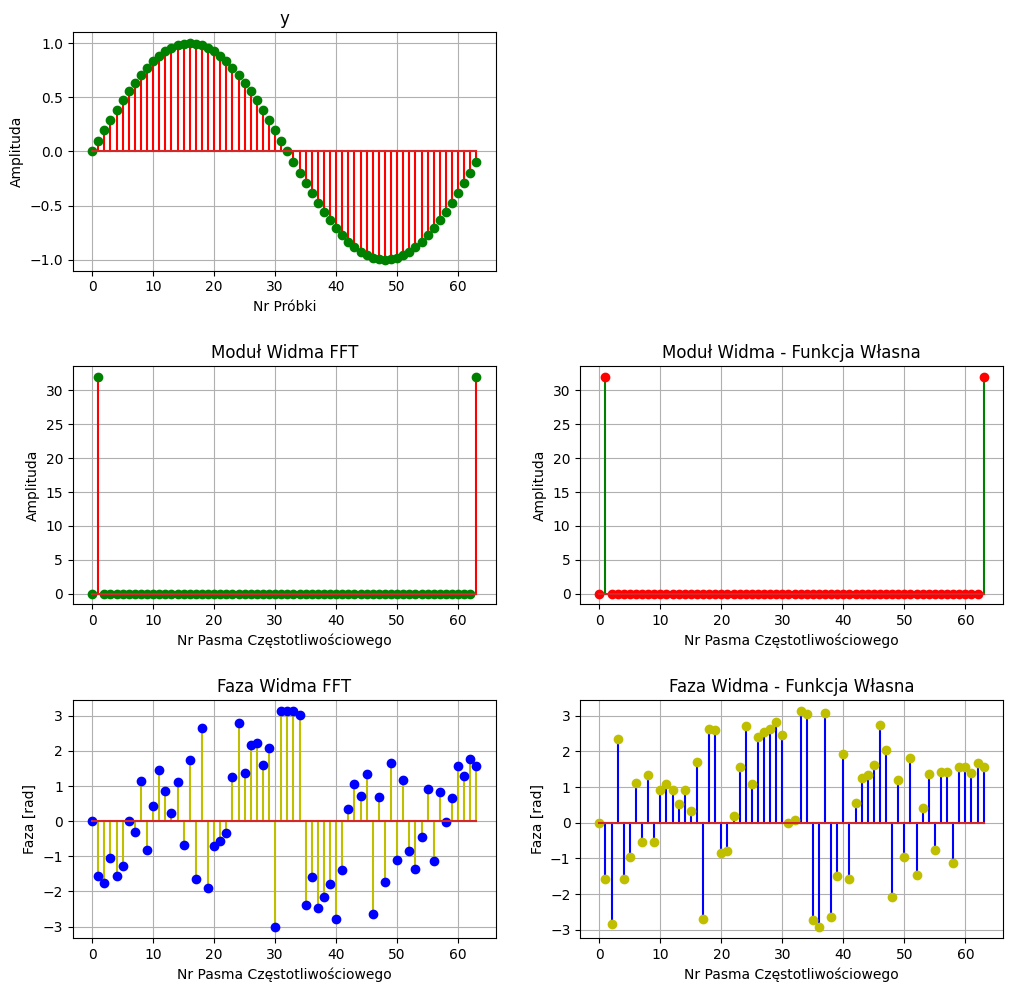

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi as PI
from math import sin
from scipy import signal
import IPython.display as ipd
from scipy.linalg import dft

def MyDFT(y):
  return dft(np.size(y)) @ y # @ zwraca wartosci rowniez do y
def MyIDFT(Y):
  return dft(np.size(y)) @ -Y 

N = 64#liczba próbek
x = np.arange(N)#Dziedzina
y = np.sin((x/N) * 2 * PI)#funkcja sinus
Y = MyDFT(y)#dyskretna transformata Fouriera

fig, plots = plt.subplots(3, 2, figsize= (12,12), dpi= 100)
fig.delaxes(plots[0][1])#służy do ukrycia niepotrzebnego wykresu

#tworzenie siatek oraz nazw osi x dla każdego wykresu
for subPlots in plots:
  for plot in subPlots:
    plot.grid(True)
    plot.set_xlabel("Nr Pasma Częstotliwościowego")

#tworzenie wykresu sinusa
plots[0][0].stem(x,y, 'r', markerfmt='go')
plots[0][0].set_title("y")
plots[0][0].set_xlabel("Nr Próbki")
plots[0][0].set_ylabel("Amplituda")

#tworzenie wykresu fft z sinusa
plots[1][0].stem(x,np.absolute(np.fft.fft(y)),'r', markerfmt='go')
plots[1][0].set_title("Moduł Widma FFT")
plots[1][0].set_ylabel("Amplituda")

#tworzenie wykresu wlasnego fft z sinusa
plots[1][1].stem(x,np.absolute(Y),'g', markerfmt='ro')
plots[1][1].set_title("Moduł Widma - Funkcja Własna")
plots[1][1].set_ylabel("Amplituda")

plots[2][0].stem(x,np.angle(np.fft.fft(y)),'y', markerfmt='bo')
plots[2][0].set_title("Faza Widma FFT")
plots[2][0].set_ylabel("Faza [rad]")

plots[2][1].stem(x,np.angle(Y),'b', markerfmt='yo')
plots[2][1].set_title("Faza Widma - Funkcja Własna")
plots[2][1].set_ylabel("Faza [rad]")

plt.subplots_adjust(hspace=0.4)#zmiana rozmiaru przeznaczonego na wykres

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning 

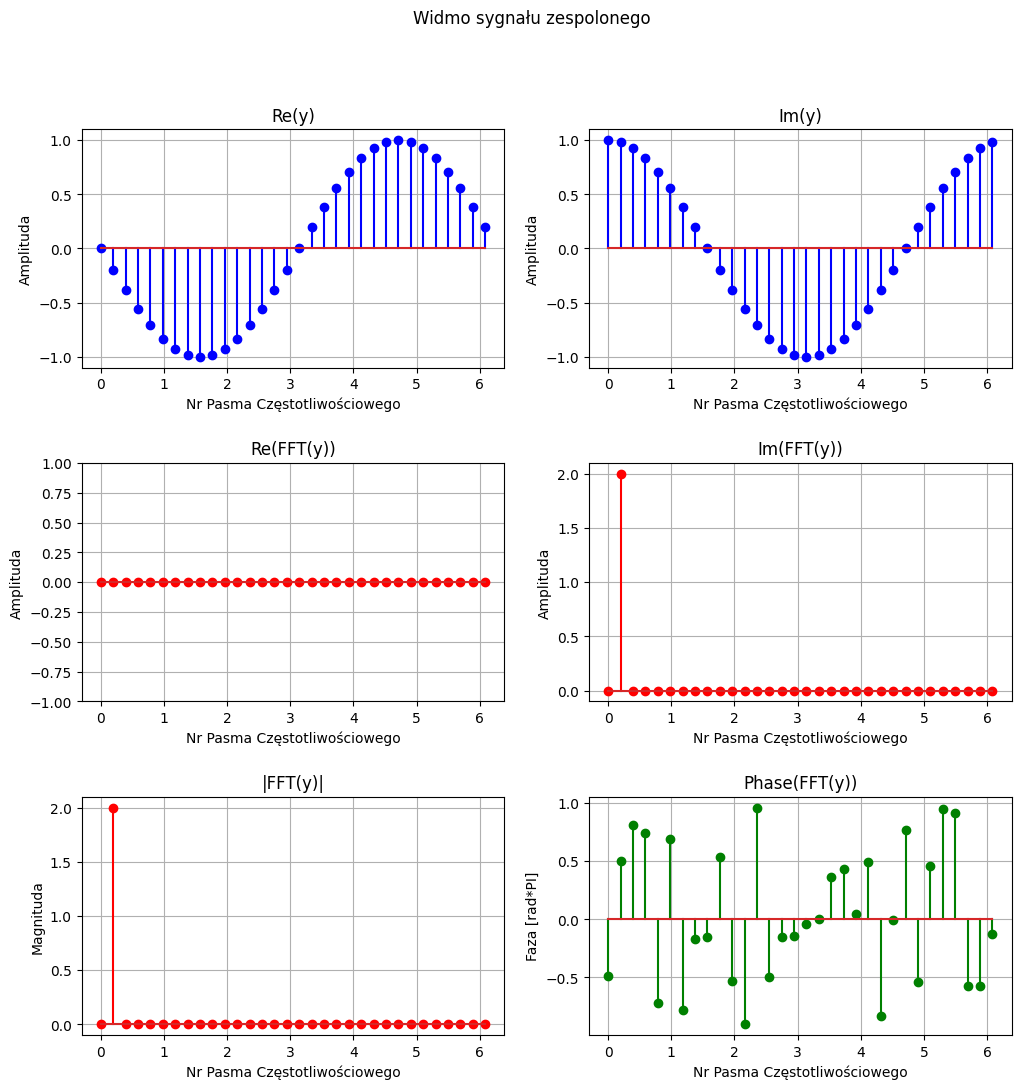

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi as PI
from math import sin
from scipy import signal
import IPython.display as ipd
from math import cos

N = 32#liczba probek
x = np.arange(N)
x = (x/N)*2*PI
y = []

for i in range(N):
  y.append(sin(x[i]+np.pi) + cos(x[i]) * 1j)
fig, plots = plt.subplots(3, 2, figsize= (12,12), dpi= 100)

for subPlots in plots:
  for plot in subPlots:
    plot.grid(True)
    plot.set_xlabel("Nr Pasma Częstotliwościowego")
    plot.set_ylabel("Amplituda")

plots[0][0].stem(x,np.real(y),'b','bo')#nieznany blad
plots[0][0].set_title("Re(y)")
plots[0][0].set_xlabel("Nr Pasma Częstotliwościowego")

plots[0][1].stem(x,np.imag(y),'b','bo')
plots[0][1].set_title("Im(y)")
plots[0][1].set_xlabel("Nr Pasma Częstotliwościowego")

Y = np.fft.fft(y) * 2 / N

plots[1][0].stem(x,np.real(Y),'r','ro')#niezrozumialy blad
plots[1][0].set_title("Re(FFT(y))")
plots[1][0].set_ylim(-1, 1)

plots[1][1].stem(x,np.imag(Y),'r','ro')
plots[1][1].set_title("Im(FFT(y))")

plots[2][0].stem(x,np.absolute(Y),'r','ro')
plots[2][0].set_title("|FFT(y)|")
plots[2][0].set_ylabel("Magnituda")

plots[2][1].stem(x,np.angle(Y)/PI,'g','go')
plots[2][1].set_title("Phase(FFT(y))")
plots[2][1].set_ylabel("Faza [rad*PI]")

plt.suptitle("Widmo sygnału zespolonego")
plt.subplots_adjust(hspace=0.4)